In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(context='notebook', style='darkgrid', palette='colorblind')

# Stage 0

In [2]:
# Took out the first line: #Table1 

df_raw = pd.read_csv('150k.csv')

In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 68 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   z              150000 non-null  float64
 1   zErr           150000 non-null  float64
 2   dec            150000 non-null  float64
 3   decErr         150000 non-null  float64
 4   dered_g        150000 non-null  float64
 5   dered_i        150000 non-null  float64
 6   dered_r        150000 non-null  float64
 7   dered_u        150000 non-null  float64
 8   dered_z        150000 non-null  float64
 9   deVRad_g       150000 non-null  float64
 10  deVRad_i       150000 non-null  float64
 11  deVRad_r       150000 non-null  float64
 12  deVRad_z       150000 non-null  float64
 13  deVRadErr_g    150000 non-null  float64
 14  deVRadErr_i    150000 non-null  float64
 15  deVRadErr_r    150000 non-null  float64
 16  deVRadErr_z    150000 non-null  float64
 17  expPhi_g       150000 non-nul

In [3]:
df_raw.head()

,z,zErr,dec,decErr,dered_g,dered_i,dered_r,dered_u,dered_z,deVRad_g,...,psfMag_i,psfMag_r,psfMag_u,psfMag_z,psfMagErr_g,psfMagErr_i,psfMagErr_r,psfMagErr_u,psfMagErr_z,ra
0,1.967009,0.001295,0.099945,0.004153,18.74923,18.55813,18.67467,18.87822,18.45218,0.091994,...,18.92338,19.15566,19.76303,18.72110,0.017365,0.015810,0.015986,0.029013,0.033841,57.405766
1,0.133383,0.000062,0.075584,0.009540,19.82256,18.39337,18.82100,21.98708,18.03142,0.833777,...,19.37808,19.95601,23.14468,18.83381,0.053584,0.083252,0.069951,0.343517,0.051267,57.488430
2,0.505413,0.000175,0.036211,0.036408,21.45808,18.62883,19.56389,21.53409,18.04682,0.939758,...,20.09372,21.19098,23.46836,19.39700,0.149051,0.025049,0.041548,0.401160,0.053212,57.590708
3,1.248642,0.000341,0.971539,0.012089,20.41834,20.08604,19.99310,20.21941,20.27955,0.230714,...,20.20711,20.18484,20.56856,20.31880,0.037061,0.045533,0.028918,0.050030,0.120847,44.283683
4,0.066696,0.000006,1.047021,0.015802,19.00809,18.25147,18.56176,19.90209,18.13738,1.461907,...,19.12809,19.55080,21.05799,18.91005,0.019690,0.023346,0.018100,0.068637,0.039914,49.275599


In [13]:
df_raw.describe()

,z,zErr,dec,decErr,dered_g,dered_i,dered_r,dered_u,dered_z,deVRad_g,...,psfMag_i,psfMag_r,psfMag_u,psfMag_z,psfMagErr_g,psfMagErr_i,psfMagErr_r,psfMagErr_u,psfMagErr_z,ra
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.623556,0.009047,26.065982,0.046213,19.382333,18.686139,19.279233,20.907164,17.885864,2.320062,...,19.659901,20.267409,21.618330,18.814536,-0.850326,0.060864,0.082660,-0.561751,-0.360454,159.668317
std,0.680948,0.500482,27.296625,0.057168,100.208428,1.619159,1.727408,100.229178,68.449357,100.140394,...,1.191152,1.358463,100.226481,68.446516,99.993146,0.350136,1.680287,100.000166,68.306093,56.061613
min,0.000003,-6.000000,-8.731240,0.000581,-9999.000000,10.984870,11.544330,-9999.000000,-9999.000000,-9999.000000,...,14.250490,14.391180,-9999.000000,-9999.000000,-9999.000000,0.007652,0.007005,-9999.000000,-9999.000000,5.715961
25%,0.165326,0.000030,-0.269621,0.011711,18.536315,17.208308,17.613557,20.046878,16.935880,0.456565,...,18.736677,19.125528,21.216950,18.434185,0.024549,0.020636,0.020218,0.088724,0.034567,127.488092
50%,0.475981,0.000104,14.532019,0.030656,20.889490,19.126615,19.827730,21.998690,18.733645,1.770002,...,19.957015,20.544065,22.774890,19.549170,0.060388,0.033562,0.038637,0.329134,0.073749,159.537029
75%,0.634242,0.000187,53.410681,0.062214,21.910835,19.813852,20.640403,23.568597,19.429057,3.753671,...,20.536603,21.376780,24.018160,20.074288,0.148888,0.050262,0.069605,0.683660,0.115950,199.928563
max,5.976685,68.149880,68.739531,3.907853,29.960940,30.005690,31.137200,29.817460,28.150440,29.688530,...,24.362560,24.806330,26.956760,24.124420,290.553500,45.547210,621.494400,420.356800,35.254630,348.902530


In [ ]:
sns.set_style("whitegrid")


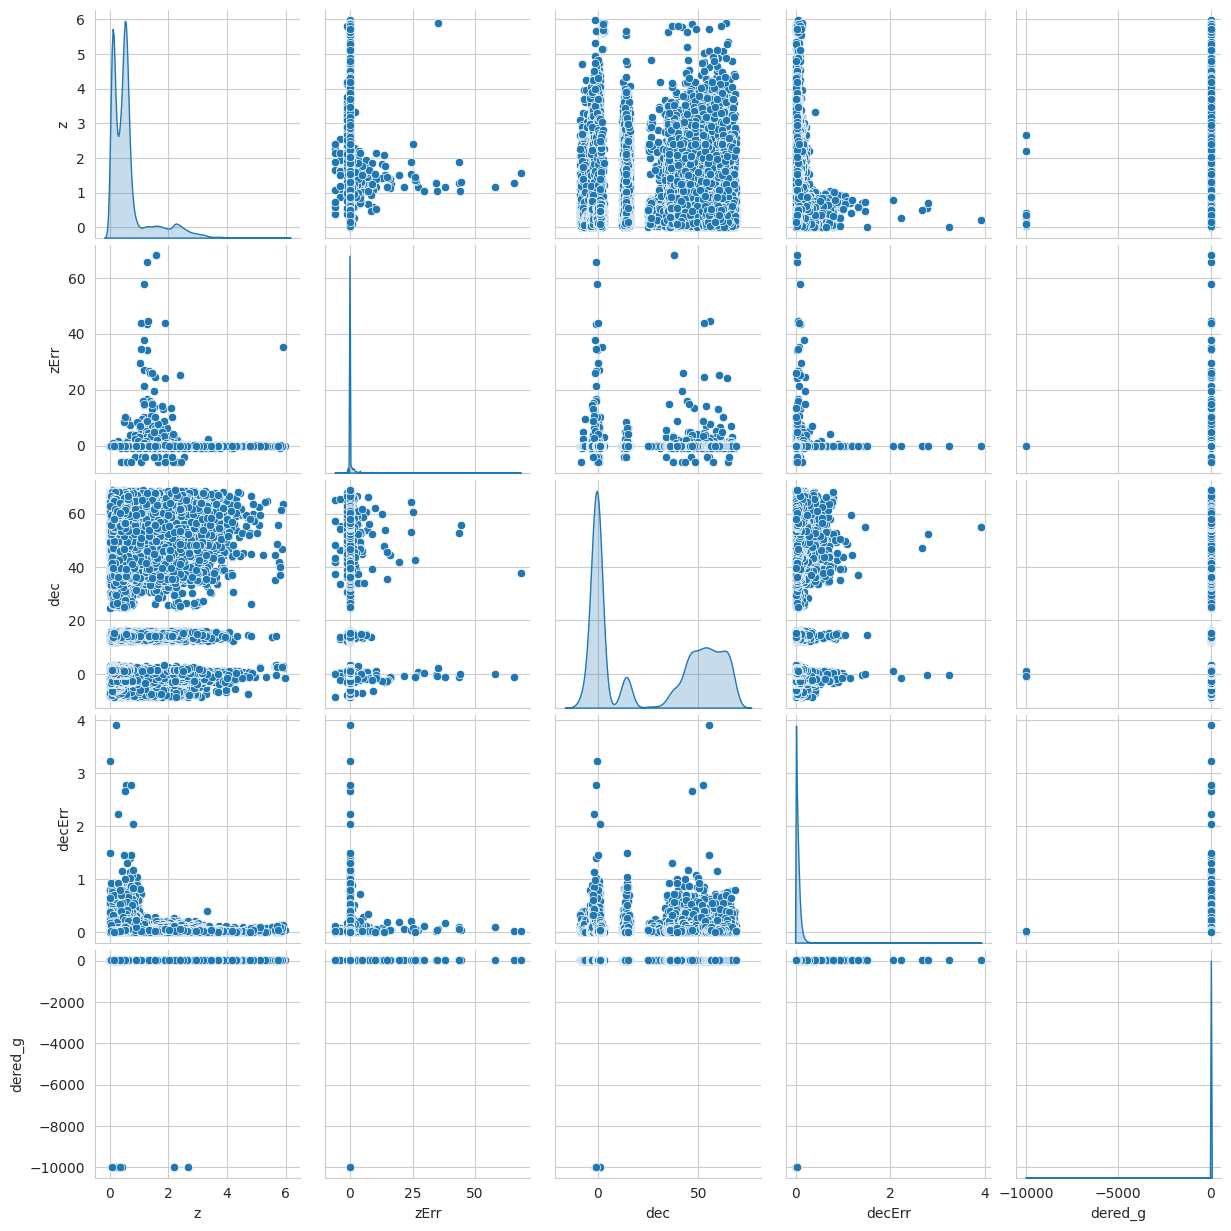

In [20]:
sns.pairplot(df_raw.iloc[:, :5], diag_kind='kde')

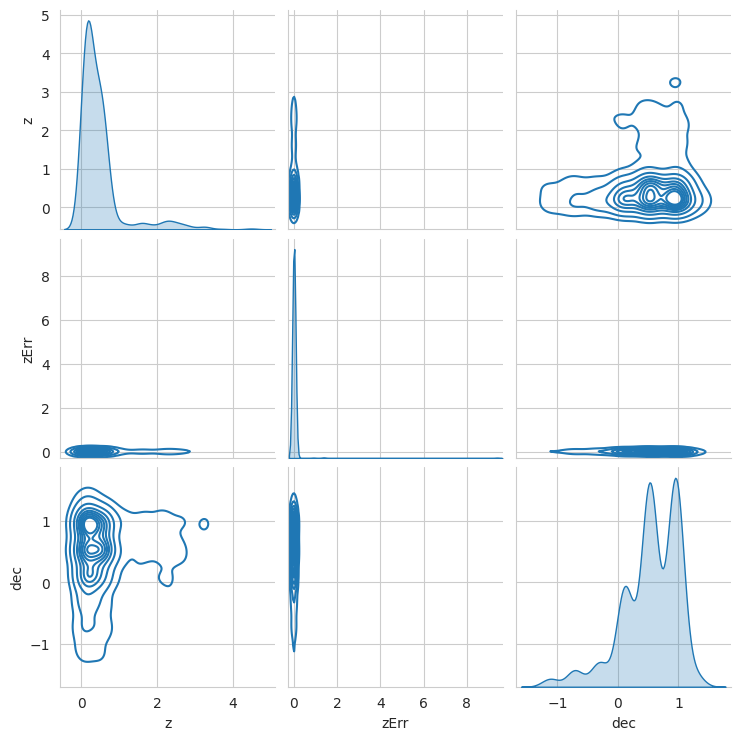

In [22]:
sns.pairplot(df_raw.iloc[:1000, :3], kind='kde')

In [23]:
df_raw.columns

Index(['z', 'zErr', 'dec', 'decErr', 'dered_g', 'dered_i', 'dered_r',
       'dered_u', 'dered_z', 'deVRad_g', 'deVRad_i', 'deVRad_r', 'deVRad_z',
       'deVRadErr_g', 'deVRadErr_i', 'deVRadErr_r', 'deVRadErr_z', 'expPhi_g',
       'expPhi_i', 'expPhi_r', 'expPhi_u', 'expPhi_z', 'expRad_g', 'expRad_i',
       'expRad_r', 'expRad_z', 'expRadErr_g', 'expRadErr_i', 'expRadErr_r',
       'expRadErr_z', 'extinction_g', 'extinction_i', 'extinction_r',
       'extinction_u', 'extinction_z', 'fiberMag_g', 'fiberMag_i',
       'fiberMag_r', 'fiberMag_u', 'fiberMag_z', 'fiberMagErr_g',
       'fiberMagErr_i', 'fiberMagErr_r', 'fiberMagErr_u', 'fiberMagErr_z',
       'modelMag_g', 'modelMag_i', 'modelMag_r', 'modelMag_u', 'modelMag_z',
       'modelMagErr_g', 'modelMagErr_i', 'modelMagErr_r', 'modelMagErr_u',
       'modelMagErr_z', 'petroRad_r', 'petroRadErr_r', 'psfMag_g', 'psfMag_i',
       'psfMag_r', 'psfMag_u', 'psfMag_z', 'psfMagErr_g', 'psfMagErr_i',
       'psfMagErr_r', 'psfMagErr_u', 

In [ ]:
for i in df_raw.columns:
    if i[:5]=='dered':
        print(i)        

dered_g
dered_i
dered_r
dered_u
dered_z


In [4]:
for i in df_raw.columns:
    if i[:5]=='fiber':
        print(i)

fiberMag_g
fiberMag_i
fiberMag_r
fiberMag_u
fiberMag_z
fiberMagErr_g
fiberMagErr_i
fiberMagErr_r
fiberMagErr_u
fiberMagErr_z


In [5]:
for i in df_raw.columns:
    if i[:3]=='deV':
        print(i)

deVRad_g
deVRad_i
deVRad_r
deVRad_z
deVRadErr_g
deVRadErr_i
deVRadErr_r
deVRadErr_z


In [11]:
for i in df_raw.columns:
    if i[:3]=='exp':
        print(i)

expPhi_g
expPhi_i
expPhi_r
expPhi_u
expPhi_z
expRad_g
expRad_i
expRad_r
expRad_z
expRadErr_g
expRadErr_i
expRadErr_r
expRadErr_z


In [17]:
# Separate them into 3 categories

# Define the categories and their corresponding columns
categories = {
    'Positional and Redshift': ['z', 'zErr', 'dec', 'decErr', 'ra'],
    'Magnitude and Flux Measurements': ['dered_g', 'dered_i', 'dered_r', 'dered_u', 'dered_z', 'extinction_g', 'extinction_i', 'extinction_r', 'extinction_u', 'extinction_z', 'fiberMag_g', 'fiberMag_i', 'fiberMag_r', 'fiberMag_u', 'fiberMag_z', 'fiberMagErr_g', 'fiberMagErr_i', 'fiberMagErr_r', 'fiberMagErr_u', 'fiberMagErr_z', 'modelMag_g', 'modelMag_i', 'modelMag_r', 'modelMag_u', 'modelMag_z', 'modelMagErr_g', 'modelMagErr_i', 'modelMagErr_r', 'modelMagErr_u', 'modelMagErr_z', 'psfMag_g', 'psfMag_i', 'psfMag_r', 'psfMag_u', 'psfMag_z', 'psfMagErr_g', 'psfMagErr_i', 'psfMagErr_r', 'psfMagErr_u', 'psfMagErr_z'],
    'Morphological and Shape': ['deVRad_g', 'deVRad_i', 'deVRad_r', 'deVRad_z', 'deVRadErr_g', 'deVRadErr_i', 'deVRadErr_r', 'deVRadErr_z', 'expRad_g', 'expRad_i', 'expRad_r', 'expRad_z', 'expRadErr_g', 'expRadErr_i', 'expRadErr_r', 'expRadErr_z', 'petroRad_r', 'petroRadErr_r','expPhi_g', 'expPhi_i', 'expPhi_r', 'expPhi_u', 'expPhi_z']
}

df = df_raw

# Create the multi-index tuples
multi_index_tuples = []
for category, columns in categories.items():
    for col in columns:
        if col in df.columns:
            multi_index_tuples.append((category, col))

# Create the new MultiIndex and assign it to the DataFrame's columns
new_columns = pd.MultiIndex.from_tuples(multi_index_tuples, names=['Category', 'Variable'])
df.columns = new_columns

In [18]:
df

Category Positional and Redshift                                           \
Variable                       z      zErr        dec    decErr        ra   
0                       1.967009  0.001295   0.099945  0.004153  18.74923   
1                       0.133383  0.000062   0.075584  0.009540  19.82256   
2                       0.505413  0.000175   0.036211  0.036408  21.45808   
3                       1.248642  0.000341   0.971539  0.012089  20.41834   
4                       0.066696  0.000006   1.047021  0.015802  19.00809   
...                          ...       ...        ...       ...       ...   
149995                  0.523190  0.000102  56.332271  0.039700  21.26369   
149996                  0.508194  0.000221  61.501827  0.044107  22.25257   
149997                  0.234232  0.000044  61.015388  0.012894  18.94200   
149998                  0.352076  0.000068  60.126007  0.015690  20.67480   
149999                  0.159817  0.000034  58.108272  0.008019  18.33011   

Category Magnitude and Flux Measurements                                \
Variable                         dered_g   dered_i   dered_r   dered_u   
0                               18.55813  18.67467  18.87822  18.45218   
1                               18.39337  18.82100  21.98708  18.03142   
2                               18.62883  19.56389  21.53409  18.04682   
3                               20.08604  19.99310  20.21941  20.27955   
4                               18.25147  18.56176  19.90209  18.13738   
...                                  ...       ...       ...       ...   
149995                          18.45656  19.38538  23.55142  17.99068   
149996                          19.64563  20.59183  22.66739  19.18695   
149997                          17.13919  17.64632  20.86497  16.80165   
149998                          18.40559  19.04279  22.63412  17.99781   
149999                          16.76323  17.19137  20.31705  16.42603   

Category            ... Morphological and Shape                          \
Variable   dered_z  ...             expRadErr_i expRadErr_r expRadErr_z   
0         0.091994  ...                18.92338    19.15566    19.76303   
1         0.833777  ...                19.37808    19.95601    23.14468   
2         0.939758  ...                20.09372    21.19098    23.46836   
3         0.230714  ...                20.20711    20.18484    20.56856   
4         1.461907  ...                19.12809    19.55080    21.05799   
...            ...  ...                     ...         ...         ...   
149995    2.787953  ...                19.47815    20.38832    24.53234   
149996    3.709756  ...                20.54820    21.43578    23.25575   
149997    4.772612  ...                19.02218    19.42988    22.61482   
149998    1.564977  ...                19.36206    19.97786    23.25273   
149999    2.749339  ...                18.26872    18.54049    21.60494   

Category                                                                   \
Variable petroRad_r petroRadErr_r  expPhi_g  expPhi_i  expPhi_r  expPhi_u   
0          18.72110      0.017365  0.015810  0.015986  0.029013  0.033841   
1          18.83381      0.053584  0.083252  0.069951  0.343517  0.051267   
2          19.39700      0.149051  0.025049  0.041548  0.401160  0.053212   
3          20.31880      0.037061  0.045533  0.028918  0.050030  0.120847   
4          18.91005      0.019690  0.023346  0.018100  0.068637  0.039914   
...             ...           ...       ...       ...       ...       ...   
149995     19.02971      0.108178  0.022276  0.038616  0.875940  0.045896   
149996     20.00042      0.156003  0.046724  0.055938  0.410539  0.105663   
149997     18.63499      0.027229  0.018064  0.016232  0.230208  0.036420   
149998     18.96493      0.050867  0.023696  0.025761  0.385661  0.046441   
149999     17.81150      0.020006  0.018885  0.016887  0.120106  0.023813   

Category              
Variable    expPhi_z  
0          

In [ ]:
# Make sure there's no repreated elements

#df['Positional and Redshift'].columns
#df['Morphological and Shape'].columns
#df['Magnitude and Flux Measurements'].columns

for name in df['Magnitude and Flux Measurements'].columns:
    if name[-1]=='u':       # g, i, r, u, z
        print(name) 

dered_u
psfMag_u
extinction_u
fiberMag_u
fiberMagErr_u
modelMag_u
modelMagErr_u
psfMag_u
psfMagErr_u


In [19]:
# write df to pickle

df.to_pickle('150k_quali-multiindex.pkl')

In [20]:
df.iloc[:30000,].to_pickle('short-150k_quali-multiindex.pkl')

In [ ]:
# try a parquet compression

df = pd.read_pickle('150k_quali-multiindex.pkl')
df.to_parquet('150k_quali-multiindex.parquet.gz', compression='gzip', index=True)

# Failed misserably

ArrowKeyError: No type extension with name arrow.py_extension_type found

## Histograms

In [2]:
# set plot theme 
sns.set_theme(context='notebook', style='darkgrid', palette='colorblind')

In [3]:
df = pd.read_pickle('150k_quali-multiindex.pkl')

In [9]:
df.columns[0]

('Positional and Redshift', 'z')

In [12]:
df1 = df['Positional and Redshift']

<Axes: xlabel='z', ylabel='Density'>

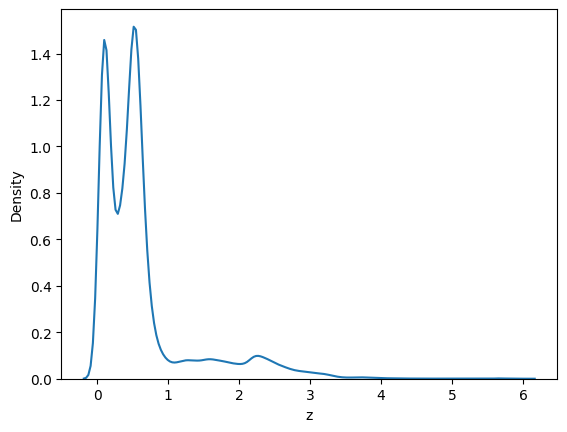

In [ ]:
sns.kdeplot(data=df1, x='z', )

In [17]:
df1.columns[0]

'z'

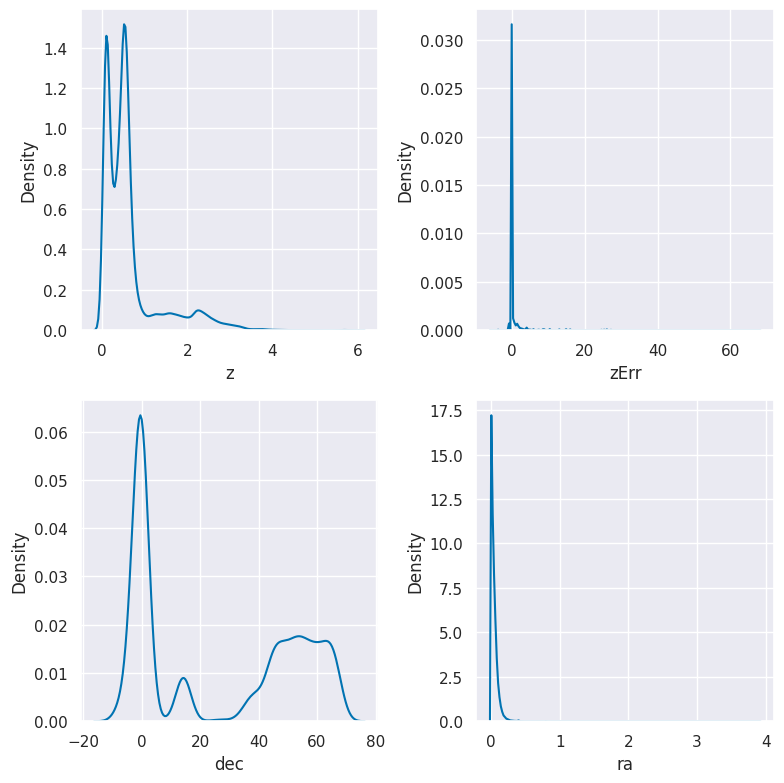

In [ ]:
plt.figure(figsize=(9,9))
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=df1, x=df1.columns[i])
    plt.xlabel(df1.columns[i])

plt.tight_layout()    

#plt.savefig('PosRedHist.png', dpi=400)

In [5]:
df1.corr()

NameError: name 'df1' is not defined

In [6]:
# Magnitude and Flux Measurements category

df2 = df['Magnitude and Flux Measurements']

In [11]:
df2['dered_r'][df2['dered_r']==-9999.0].count()

np.int64(15)

<Axes: >

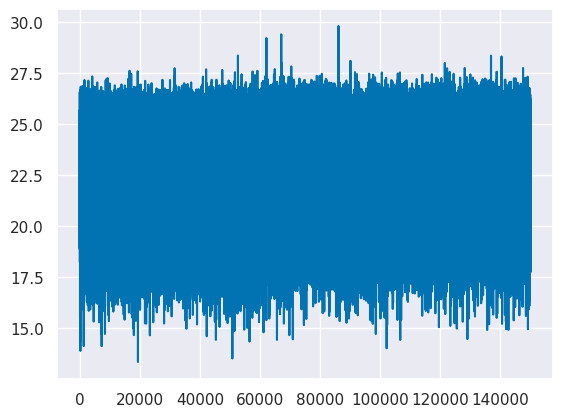

In [ ]:
df2['dered_r'][df2['dered_r']!=-9999.0].plot()

In [12]:
df2['dered_u'][df2['dered_u']==-9999.0].count()

np.int64(7)

In [18]:
df2['dered_z'][df2['dered_z']==-9999.0].count()

np.int64(15)

In [21]:
df2['fiberMag_g'].max()

544.7248

In [22]:
df2['fiberMag_g'][df2['fiberMag_g']==544.7248].count()

np.int64(1)

In [24]:
df2

Variable,dered_g,dered_i,dered_r,dered_u,dered_z,psfMag_u,extinction_g,extinction_i,extinction_r,extinction_u,...,psfMag_g,psfMag_i,psfMag_r,psfMag_u,psfMag_z,psfMagErr_g,psfMagErr_i,psfMagErr_r,psfMagErr_u,psfMagErr_z
0,18.74923,18.55813,18.67467,18.87822,18.45218,0.091994,0.020561,0.000008,0.124353,0.029213,...,19.75736,19.22635,19.48074,20.06939,18.96102,0.012913,0.015281,0.013979,0.034382,0.046895
1,19.82256,18.39337,18.82100,21.98708,18.03142,0.833777,0.746955,0.688082,0.642371,0.181982,...,21.02545,19.27947,19.83913,22.91675,18.76578,0.050222,0.117730,0.099500,0.372751,0.063157
2,21.45808,18.62883,19.56389,21.53409,18.04682,0.939758,1.203174,1.338070,1.403152,0.914764,...,23.04272,19.92693,21.01182,23.27904,19.15298,0.188110,0.026783,0.048510,0.440362,0.055010
3,20.41834,20.08604,19.99310,20.21941,20.27955,0.230714,0.014184,0.028928,0.000244,0.094621,...,20.94502,20.52366,20.47991,20.88407,20.66550,0.031329,0.044730,0.029960,0.066501,0.175977
4,19.00809,18.25147,18.56176,19.90209,18.13738,1.461907,1.565277,1.520567,1.446276,0.099041,...,19.99857,19.05833,19.44741,21.00716,18.85006,0.015696,0.014623,0.011922,0.074974,0.033414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,21.26369,18.45656,19.38538,23.55142,17.99068,2.787953,1.399779,1.740627,1.336557,1.337964,...,22.45313,19.60027,20.52954,23.89448,19.12627,0.121855,0.022485,0.035748,0.770241,0.044505
149996,22.25257,19.64563,20.59183,22.66739,19.18695,3.709756,1.219875,1.000957,0.618085,3.359835,...,23.08109,20.51541,21.43640,23.69765,20.08594,0.183700,0.053707,0.072635,0.625927,0.155383
149997,18.94200,17.13919,17.64632,20.86497,16.80165,4.772612,3.662420,3.995066,3.539256,0.417168,...,20.65893,18.80029,19.32937,22.46419,18.47024,0.024334,0.012777,0.012856,0.239720,0.037673
149998,20.67480,18.40559,19.04279,22.63412,17.99781,1.564977,1.154181,1.184421,1.176336,0.396792,...,21.66496,19.37479,20.00701,23.37165,18.95688,0.054427,0.020195,0.017751,0.497252,0.056759


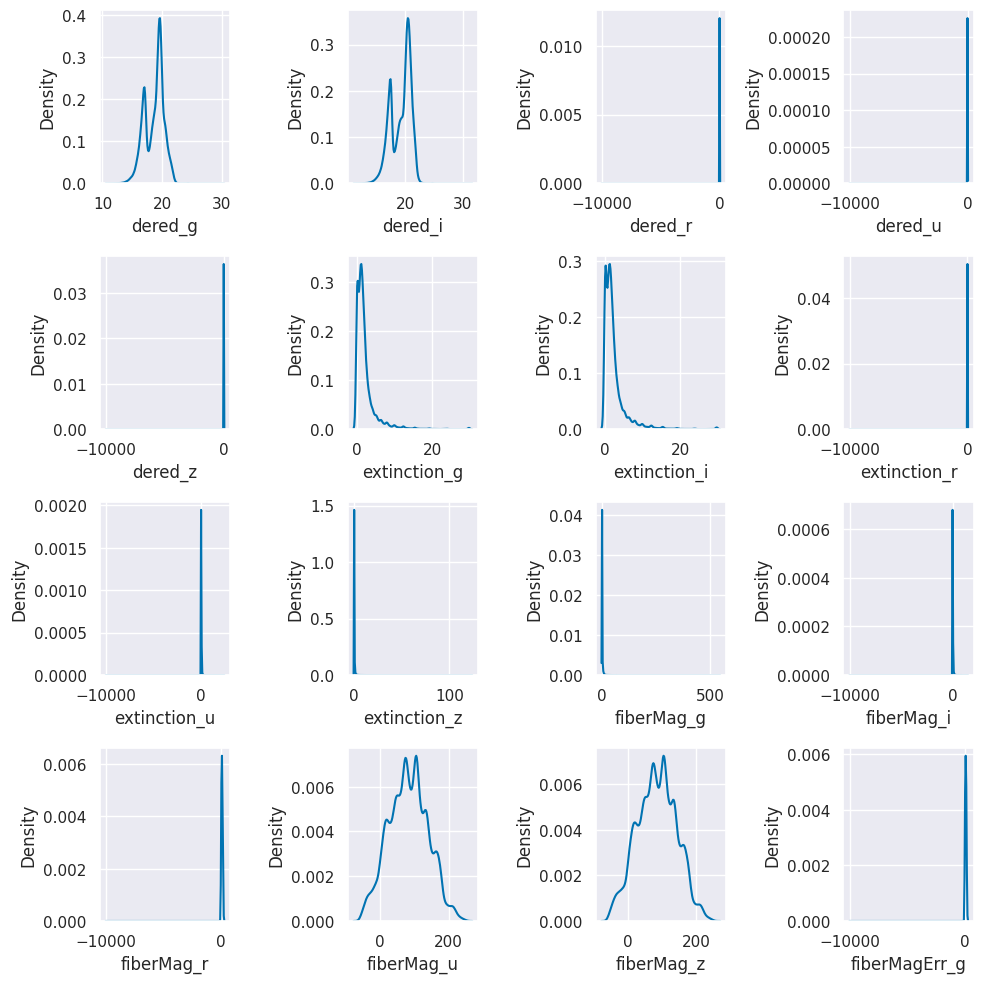

In [25]:
# there's 41 variables, let's plot 16 at a time

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    sns.kdeplot(data=df2, x=df2.columns[i])
    plt.xlabel(df2.columns[i])

plt.tight_layout()    

#plt.savefig('MagFluxHist.png', dpi=400)

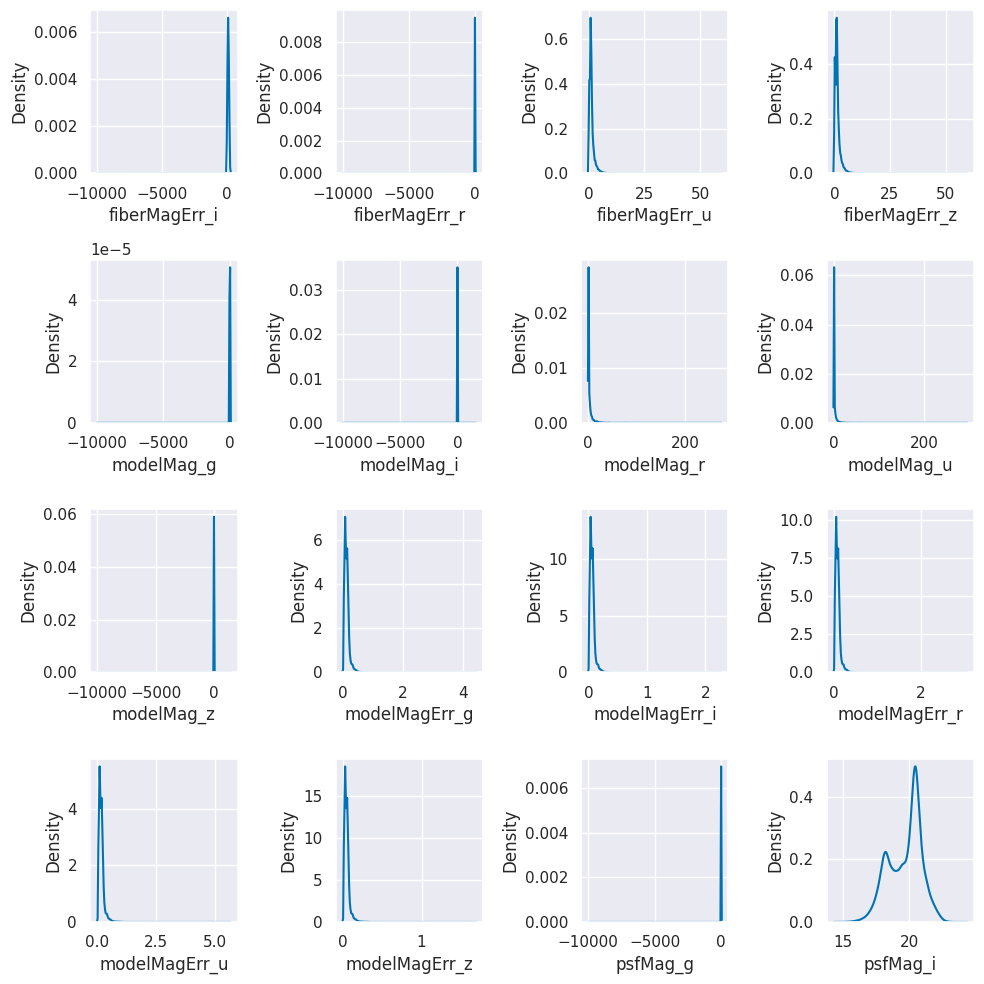

In [26]:
# there's 41 variables, let's plot 16 at a time
# 2nd group

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    sns.kdeplot(data=df2, x=df2.columns[16+i])
    plt.xlabel(df2.columns[16+i])

plt.tight_layout()    

#plt.savefig('MagFluxHist.png', dpi=400)

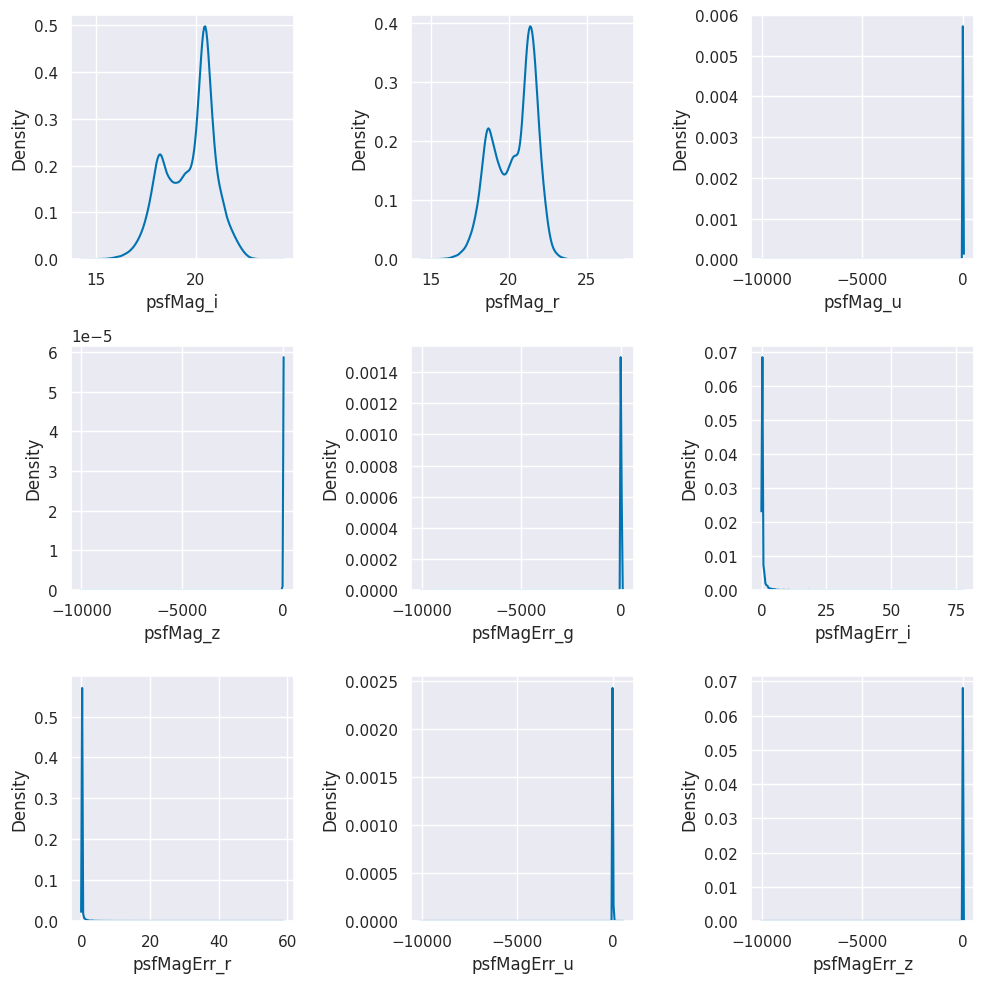

In [28]:
# there's 41 variables, let's plot 16 at a time
# 3rd group

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    sns.kdeplot(data=df2, x=df2.columns[31+i])
    plt.xlabel(df2.columns[31+i])

plt.tight_layout()    

#plt.savefig('MagFluxHist.png', dpi=400)

## 3rd category

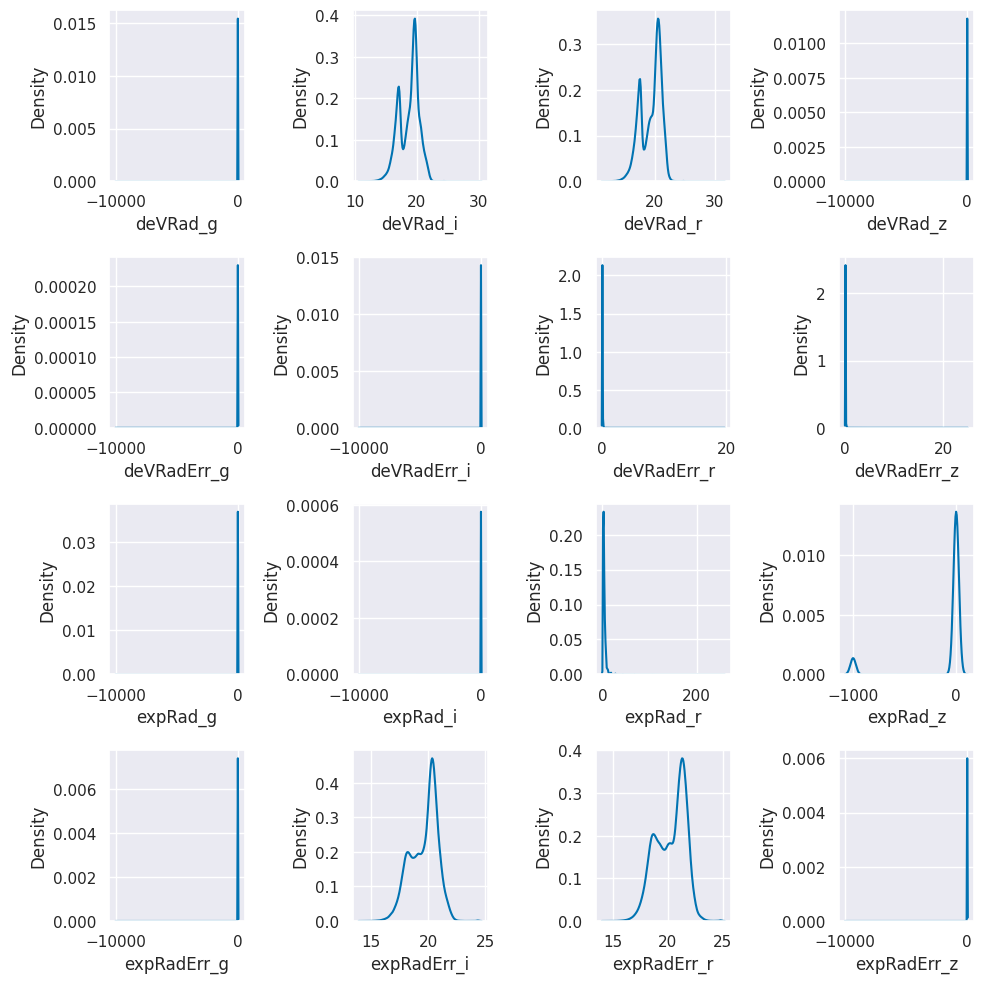

In [34]:
df3 = df['Morphological and Shape']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    sns.kdeplot(data=df3, x=df3.columns[i])
    plt.xlabel(df3.columns[i])

plt.tight_layout() 

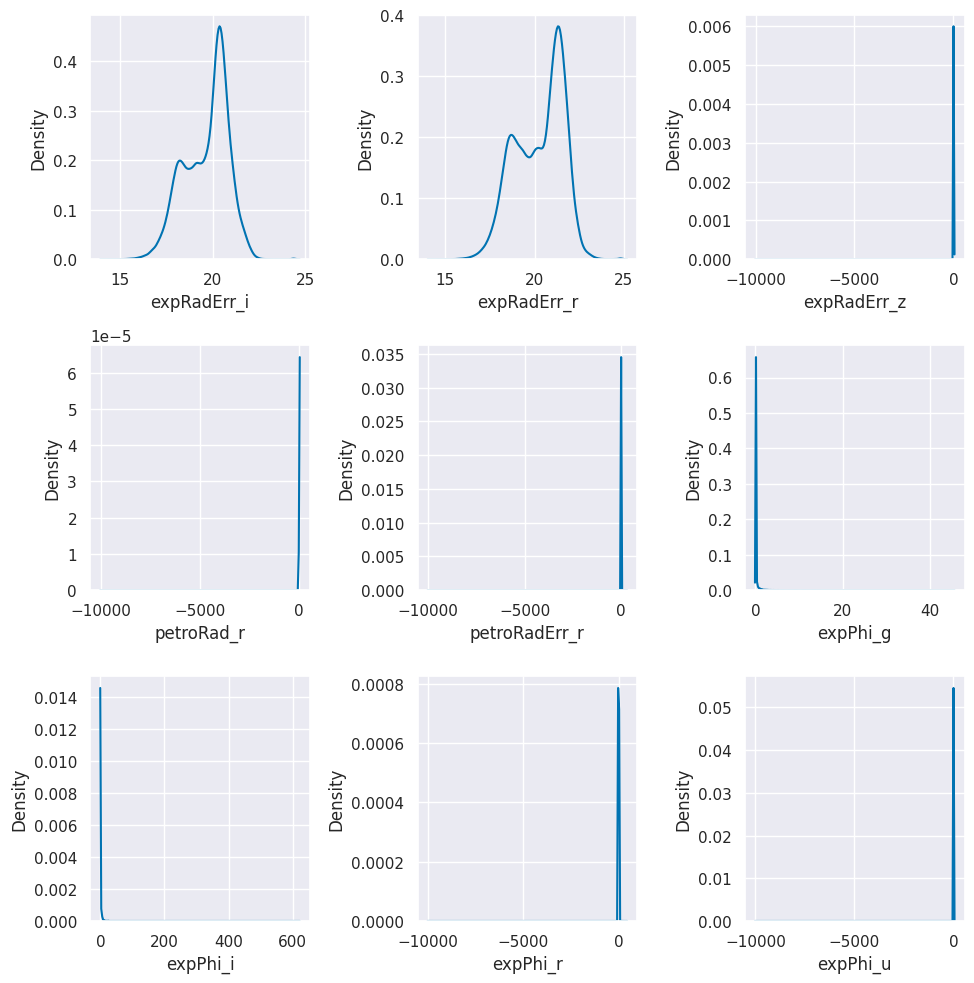

In [33]:
# 2nd lot of the 3rd gategory

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    sns.kdeplot(data=df3, x=df3.columns[13+i])
    plt.xlabel(df3.columns[13+i])

plt.tight_layout() 

## Violing plots

In [ ]:
#df = sns.load_dataset("titanic")
#sns.violinplot(x=df["age"])

# Colors
#sns.violinplot(data=df, x="class", y="age", hue="alive")

# Box + violin
#sns.violinplot(data=df, x="class", y="age", hue="alive", fill=False)

# Combined
#sns.violinplot(data=df, x="class", y="age", hue="alive", split=True, inner="quart")

# More clear?
#sns.violinplot(data=df, x="age", inner_kws=dict(box_width=15, whis_width=2, color=".8"))

# Statistical Analysis and NaN search

In [2]:
df_raw = pd.read_csv('150k.csv')

In [ ]:
# Count -9999 NaN

(df_raw==-9999).sum(numeric_only=False).sum()       # 345 '-9999' NaN

np.int64(345)

In [11]:
# Identify rows with NaN -9999 and remove them

df_clean = df_raw[(df_raw != -9999).all(axis=1)].reset_index(drop=True)
df_clean


,z,zErr,dec,decErr,dered_g,dered_i,dered_r,dered_u,dered_z,deVRad_g,...,psfMag_i,psfMag_r,psfMag_u,psfMag_z,psfMagErr_g,psfMagErr_i,psfMagErr_r,psfMagErr_u,psfMagErr_z,ra
0,1.967009,0.001295,0.099945,0.004153,18.74923,18.55813,18.67467,18.87822,18.45218,0.091994,...,18.92338,19.15566,19.76303,18.72110,0.017365,0.015810,0.015986,0.029013,0.033841,57.405766
1,0.133383,0.000062,0.075584,0.009540,19.82256,18.39337,18.82100,21.98708,18.03142,0.833777,...,19.37808,19.95601,23.14468,18.83381,0.053584,0.083252,0.069951,0.343517,0.051267,57.488430
2,0.505413,0.000175,0.036211,0.036408,21.45808,18.62883,19.56389,21.53409,18.04682,0.939758,...,20.09372,21.19098,23.46836,19.39700,0.149051,0.025049,0.041548,0.401160,0.053212,57.590708
3,1.248642,0.000341,0.971539,0.012089,20.41834,20.08604,19.99310,20.21941,20.27955,0.230714,...,20.20711,20.18484,20.56856,20.31880,0.037061,0.045533,0.028918,0.050030,0.120847,44.283683
4,0.066696,0.000006,1.047021,0.015802,19.00809,18.25147,18.56176,19.90209,18.13738,1.461907,...,19.12809,19.55080,21.05799,18.91005,0.019690,0.023346,0.018100,0.068637,0.039914,49.275599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149978,0.523190,0.000102,56.332271,0.039700,21.26369,18.45656,19.38538,23.55142,17.99068,2.787953,...,19.47815,20.38832,24.53234,19.02971,0.108178,0.022276,0.038616,0.875940,0.045896,141.116087
149979,0.508194,0.000221,61.501827,0.044107,22.25257,19.64563,20.59183,22.66739,19.18695,3.709756,...,20.54820,21.43578,23.25575,20.00042,0.156003,0.046724,0.055938,0.410539,0.105663,225.231674
149980,0.234232,0.000044,61.015388,0.012894,18.94200,17.13919,17.64632,20.86497,16.80165,4.772612,...,19.02218,19.42988,22.61482,18.63499,0.027229,0.018064,0.016232,0.230208,0.036420,226.317436
149981,0.352076,0.000068,60.126007,0.015690,20.67480,18.40559,19.04279,22.63412,17.99781,1.564977,...,19.36206,19.97786,23.25273,18.96493,0.050867,0.023696,0.025761,0.385661,0.046441,228.298076


In [13]:
# Compute moments for all variables: mean, variance, skewness, kurtosis

kurtosis = df_clean.kurtosis(numeric_only=True)
skewness = df_clean.skew(numeric_only=True)
mean = df_clean.mean(numeric_only=True)
variance = df_clean.var(numeric_only=True)

# build dataframe with the moments
moments = pd.DataFrame({'Mean': mean, 'Variance': variance, 'Skewness': skewness, 'Kurtosis': kurtosis})
moments

,Mean,Variance,Skewness,Kurtosis
z,0.623574,0.463679,2.233618,5.469135
zErr,0.009048,0.250511,81.310076,8237.162368
dec,26.068947,745.112586,0.185127,-1.756147
decErr,0.046216,0.003268,10.096847,370.267531
dered_g,20.384270,3.860253,-0.391109,-0.673984
...,...,...,...,...
psfMagErr_i,0.060868,0.122609,47.024034,3765.163399
psfMagErr_r,0.082667,2.823684,338.559555,124733.136502
psfMagErr_u,0.438192,2.090329,184.528468,49219.476784
psfMagErr_z,0.106176,0.076493,47.993031,4002.423180


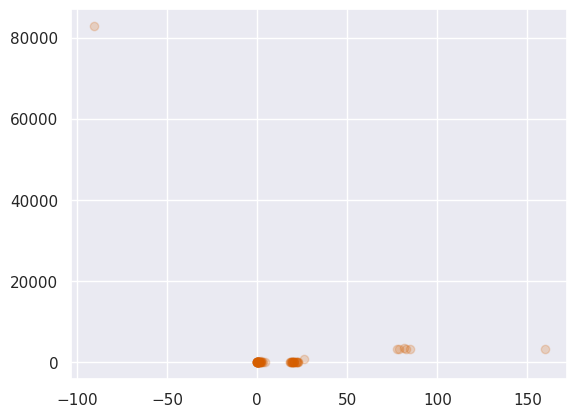

In [68]:
plt.plot(moments['Mean'], moments['Variance'], 'ro', alpha=.2)

- First take care of this high variance variable, then filter and check again

In [19]:
# Identify this high variance variable

moments[moments['Variance']>80000]

,Mean,Variance,Skewness,Kurtosis
petroRadErr_r,-90.636396,82849.866959,-2.842803,6.081671


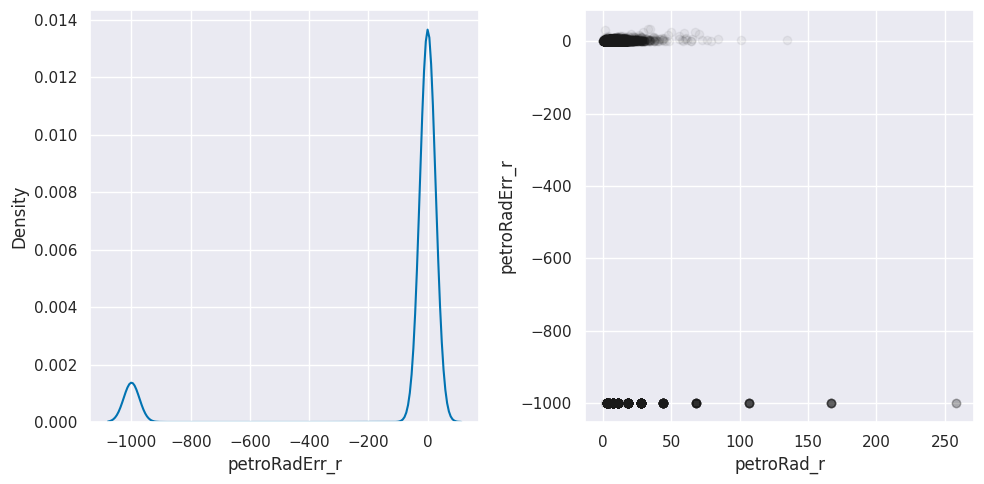

In [67]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.kdeplot(data=df_clean, x='petroRadErr_r',ax=ax[0])
ax[1].plot(df_clean['petroRad_r'],df_clean['petroRadErr_r'], 'ko', alpha=.05)
ax[1].set_xlabel('petroRad_r')
ax[1].set_ylabel('petroRadErr_r')

plt.tight_layout()

In [32]:
# There u go, more NaN

df_clean[df_clean['petroRadErr_r']==-1000]

,z,zErr,dec,decErr,dered_g,dered_i,dered_r,dered_u,dered_z,deVRad_g,...,psfMag_i,psfMag_r,psfMag_u,psfMag_z,psfMagErr_g,psfMagErr_i,psfMagErr_r,psfMagErr_u,psfMagErr_z,ra
2,0.505413,0.000175,0.036211,0.036408,21.45808,18.62883,19.56389,21.53409,18.04682,0.939758,...,20.09372,21.19098,23.46836,19.39700,0.149051,0.025049,0.041548,0.401160,0.053212,57.590708
19,0.461551,0.000093,0.630680,0.042475,22.39124,19.64379,20.66154,24.46195,19.16456,0.390522,...,20.52433,21.56934,24.56335,20.01338,0.188382,0.048002,0.072166,0.981649,0.085274,37.283294
24,0.704249,0.000188,0.905266,0.113456,21.64398,18.95818,20.25848,23.36737,18.34839,3.699732,...,20.63133,22.17416,23.94472,19.92391,0.223112,0.041982,0.098895,0.580111,0.079367,56.159150
25,0.384630,0.000202,0.944911,0.044276,21.99326,19.21411,19.98687,24.35744,18.86664,12.314840,...,20.51028,21.37318,24.68530,19.98701,0.240738,0.038986,0.052589,0.712043,0.085415,56.297503
77,0.139180,0.000023,0.943500,0.145410,19.56672,18.86415,19.23410,20.79498,20.54739,13.611600,...,21.90196,22.43315,23.88133,21.99833,0.126650,0.123167,0.126432,0.414979,0.698121,55.959601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149931,0.053030,0.000024,52.352527,0.090584,18.00815,17.26132,17.49836,19.40170,17.08686,19.120320,...,20.00698,20.24039,21.78025,19.83243,0.038708,0.038024,0.033485,0.157678,0.098439,126.089960
149939,0.811512,0.000376,58.811308,0.126916,24.71308,20.39412,22.02971,22.41031,19.50558,29.670270,...,21.79066,23.25561,24.12554,20.97063,0.575686,0.126622,0.349694,0.789875,0.259331,138.409929
149944,0.405915,0.000094,61.171518,0.029620,21.29836,18.65532,19.35833,23.31296,18.21292,1.619148,...,19.96521,20.56061,23.64412,19.42097,0.107033,0.058942,0.038068,0.554383,0.067179,144.395435
149948,0.526609,0.000121,62.371664,0.111097,22.34081,19.49384,20.50241,25.10361,18.79486,0.637124,...,20.84233,21.90156,24.86750,20.16576,0.262316,0.054439,0.096310,0.719670,0.110338,147.390488


Well, that's a bit much...

Text(0.5, 0, 'Mean')

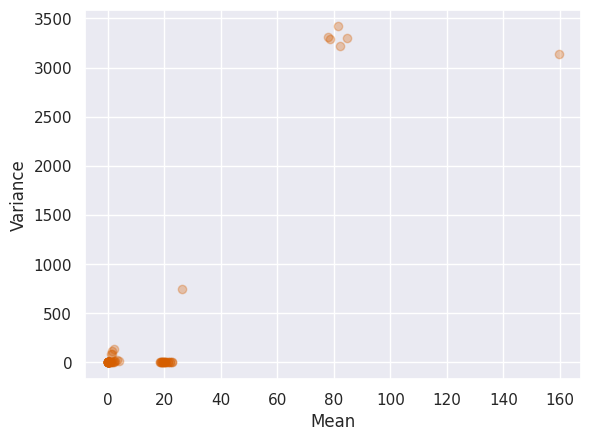

In [73]:
# Filter this variable and go again

plt.plot(moments.drop('petroRadErr_r')['Mean'], moments.drop('petroRadErr_r')['Variance'], 'ro', alpha=.3)
plt.ylabel('Variance')
plt.xlabel('Mean')

In [75]:
# Identify high variance variables

moments[moments['Variance']>3000].drop('petroRadErr_r')

,Mean,Variance,Skewness,Kurtosis
expPhi_g,77.760353,3307.210941,0.159768,-0.492243
expPhi_i,82.293326,3219.892924,0.034826,-0.407842
expPhi_r,84.824056,3301.723113,-0.016183,-0.437914
expPhi_u,81.519477,3418.428656,0.036971,-0.548888
expPhi_z,78.525695,3287.755210,0.043655,-0.473961
ra,159.663012,3142.965812,-0.624247,0.362428


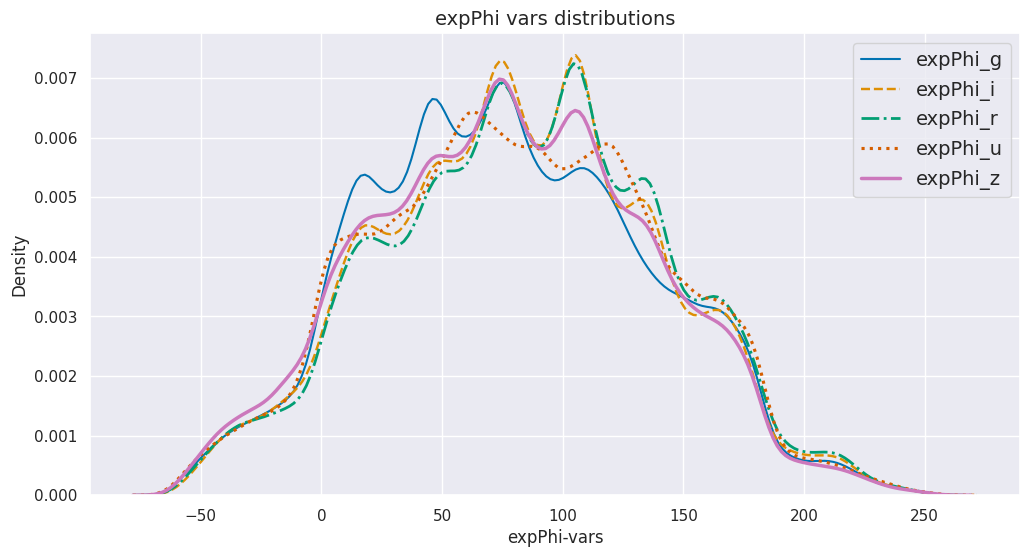

In [ ]:
# Visualize expPhi distributions

vars = moments[moments['Variance']>3000].drop(['petroRadErr_r', 'ra']).index
styles = ['-', '--', '-.', ':', '-']
lws = np.linspace(1.5, 2.5, 5)

plt.figure(figsize=(12,6)); fs=14
plt.title('expPhi vars distributions', fontsize=fs)

for var, style, lw in zip(vars, styles, lws):
    sns.kdeplot(data=df_clean, x=var, label=var, linestyle=style, linewidth=lw)

plt.xlabel('expPhi-vars')
plt.legend(fontsize=fs)

plt.savefig('../IMG/expPhi_KDE.png', dpi=400)

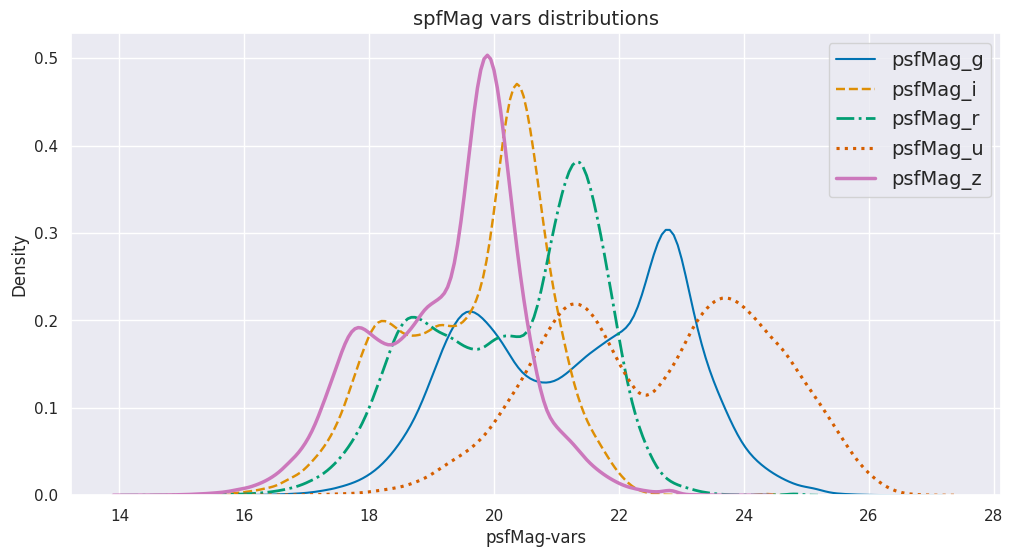

In [98]:
## More plots

vars = ['psfMag_g', 'psfMag_i', 'psfMag_r', 'psfMag_u', 'psfMag_z']
styles = ['-', '--', '-.', ':', '-']
lws = np.linspace(1.5, 2.5, 5)

plt.figure(figsize=(12,6)); fs=14
plt.title('spfMag vars distributions', fontsize=fs)

for var, style, lw in zip(vars, styles, lws):
    sns.kdeplot(data=df_clean, x=var, label=var, linestyle=style, linewidth=lw)

plt.xlabel('psfMag-vars')
plt.legend(fontsize=fs)

plt.savefig('../IMG/spfMag_KDE.png', dpi=400)

In [102]:
df_clean.columns

Index(['z', 'zErr', 'dec', 'decErr', 'dered_g', 'dered_i', 'dered_r',
       'dered_u', 'dered_z', 'deVRad_g', 'deVRad_i', 'deVRad_r', 'deVRad_z',
       'deVRadErr_g', 'deVRadErr_i', 'deVRadErr_r', 'deVRadErr_z', 'expPhi_g',
       'expPhi_i', 'expPhi_r', 'expPhi_u', 'expPhi_z', 'expRad_g', 'expRad_i',
       'expRad_r', 'expRad_z', 'expRadErr_g', 'expRadErr_i', 'expRadErr_r',
       'expRadErr_z', 'extinction_g', 'extinction_i', 'extinction_r',
       'extinction_u', 'extinction_z', 'fiberMag_g', 'fiberMag_i',
       'fiberMag_r', 'fiberMag_u', 'fiberMag_z', 'fiberMagErr_g',
       'fiberMagErr_i', 'fiberMagErr_r', 'fiberMagErr_u', 'fiberMagErr_z',
       'modelMag_g', 'modelMag_i', 'modelMag_r', 'modelMag_u', 'modelMag_z',
       'modelMagErr_g', 'modelMagErr_i', 'modelMagErr_r', 'modelMagErr_u',
       'modelMagErr_z', 'petroRad_r', 'petroRadErr_r', 'psfMag_g', 'psfMag_i',
       'psfMag_r', 'psfMag_u', 'psfMag_z', 'psfMagErr_g', 'psfMagErr_i',
       'psfMagErr_r', 'psfMagErr_u', 

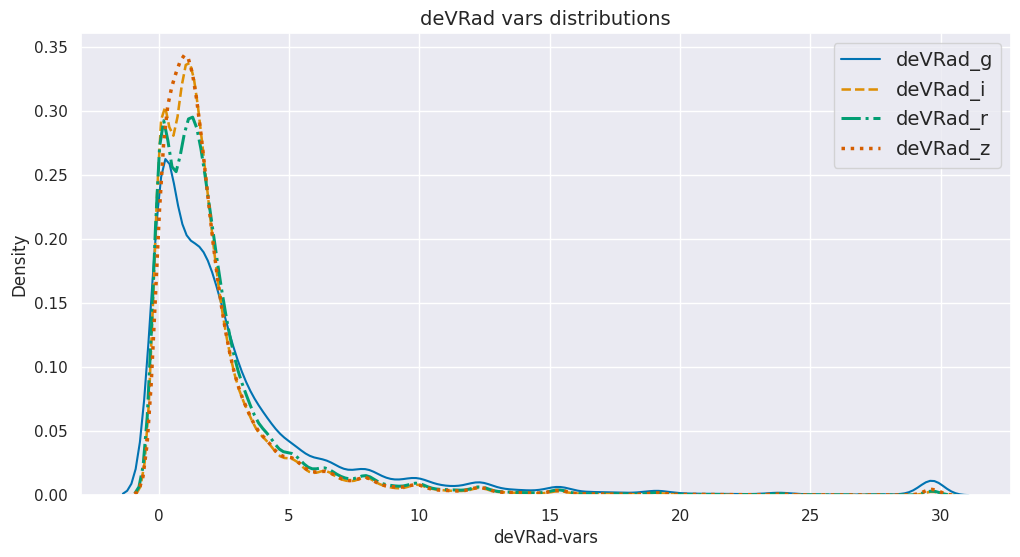

In [106]:
## More plots

vars = ['deVRad_g', 'deVRad_i', 'deVRad_r', 'deVRad_z']
styles = ['-', '--', '-.', ':']
lws = np.linspace(1.5, 2.5, 4)

plt.figure(figsize=(12,6)); fs=14
plt.title('deVRad vars distributions', fontsize=fs)

for var, style, lw in zip(vars, styles, lws):
    sns.kdeplot(data=df_clean, x=var, label=var, linestyle=style, linewidth=lw)

plt.xlabel('deVRad-vars')
plt.legend(fontsize=fs)

plt.savefig('../IMG/deVRad_KDE.png', dpi=400)

- Investigate this local mode at the right, since it's present in all filters, it looks like something meaningful (not a Nan)

In [ ]:
## More plots

vars = ['fiberMag_g', 'fiberMag_i',
       'fiberMag_r', 'fiberMag_u', 'fiberMag_z']
styles = ['-', '--', '-.', ':', '-']
lws = np.linspace(1.5, 2.5, 5)

plt.figure(figsize=(12,6)); fs=14
plt.title('fiberMag vars distributions', fontsize=fs)

for var, style, lw in zip(vars, styles, lws):
    sns.kdeplot(data=df_clean, x=var, label=var, linestyle=style, linewidth=lw)

plt.xlabel('fiberMag-vars')
plt.legend(fontsize=fs)

#plt.savefig('../IMG/fiberMag_KDE.png', dpi=400)

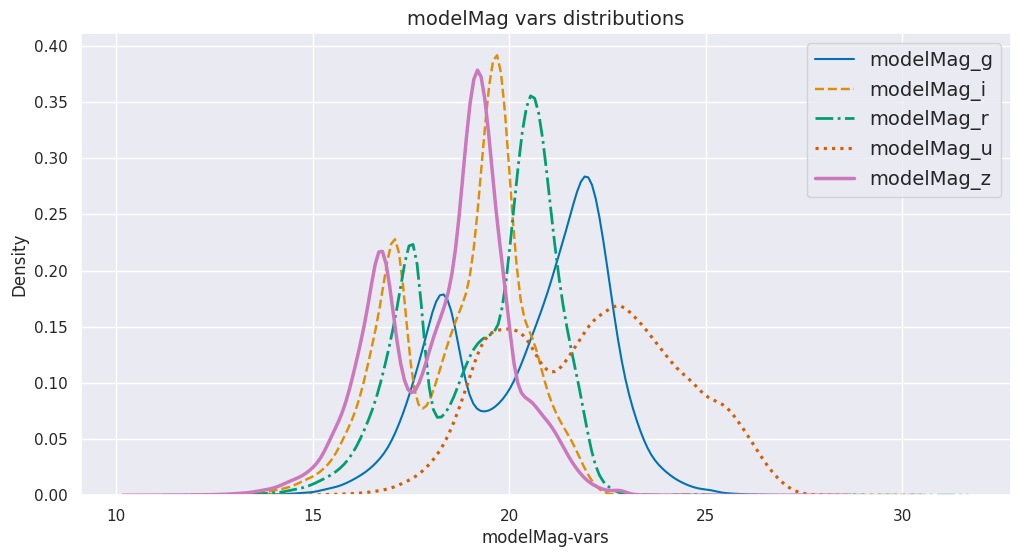

In [ ]:
## More plots

vars = ['dered_g', 'dered_i', 'dered_r',
       'dered_u', 'dered_z']
styles = ['-', '--', '-.', ':', '-']
lws = np.linspace(1.5, 2.5, 5)

plt.figure(figsize=(12,6)); fs=14
plt.title('dered vars distributions', fontsize=fs)

for var, style, lw in zip(vars, styles, lws):
    sns.kdeplot(data=df_clean, x=var, label=var, linestyle=style, linewidth=lw)

plt.xlabel('dered-vars')
plt.legend(fontsize=fs)

#plt.savefig('../IMG/dered_KDE.png', dpi=400)

In [ ]:
## More plots

vars = ['modelMag_g', 'modelMag_i', 'modelMag_r', 'modelMag_u', 'modelMag_z']
styles = ['-', '--', '-.', ':', '-']
lws = np.linspace(1.5, 2.5, 5)

plt.figure(figsize=(12,6)); fs=14
plt.title('modelMag vars distributions', fontsize=fs)

for var, style, lw in zip(vars, styles, lws):
    sns.kdeplot(data=df_clean, x=var, label=var, linestyle=style, linewidth=lw)

plt.xlabel('modelMag-vars')
plt.legend(fontsize=fs)

plt.savefig('../IMG/modelMag_KDE.png', dpi=400)

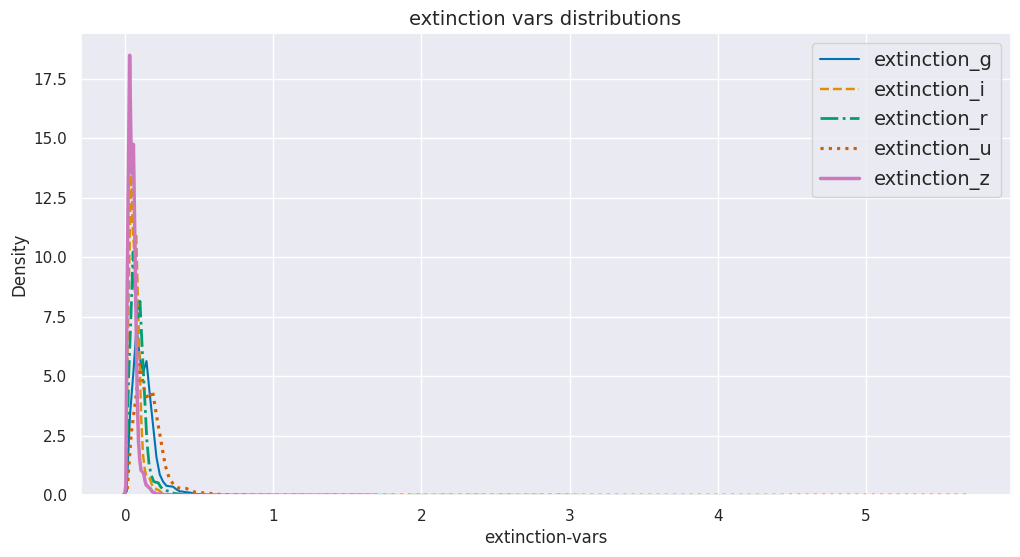

In [ ]:
## More plots

vars = ['extinction_g', 'extinction_i', 'extinction_r',
       'extinction_u', 'extinction_z']
styles = ['-', '--', '-.', ':', '-']
lws = np.linspace(1.5, 2.5, 5)

plt.figure(figsize=(12,6)); fs=14
plt.title('extinction vars distributions', fontsize=fs)

for var, style, lw in zip(vars, styles, lws):
    sns.kdeplot(data=df_clean, x=var, label=var, linestyle=style, linewidth=lw)

plt.xlabel('extinction-vars')
plt.legend(fontsize=fs)

#plt.savefig('../IMG/extinction_KDE.png', dpi=400)

# Applied some filters

- Any NaNs here?

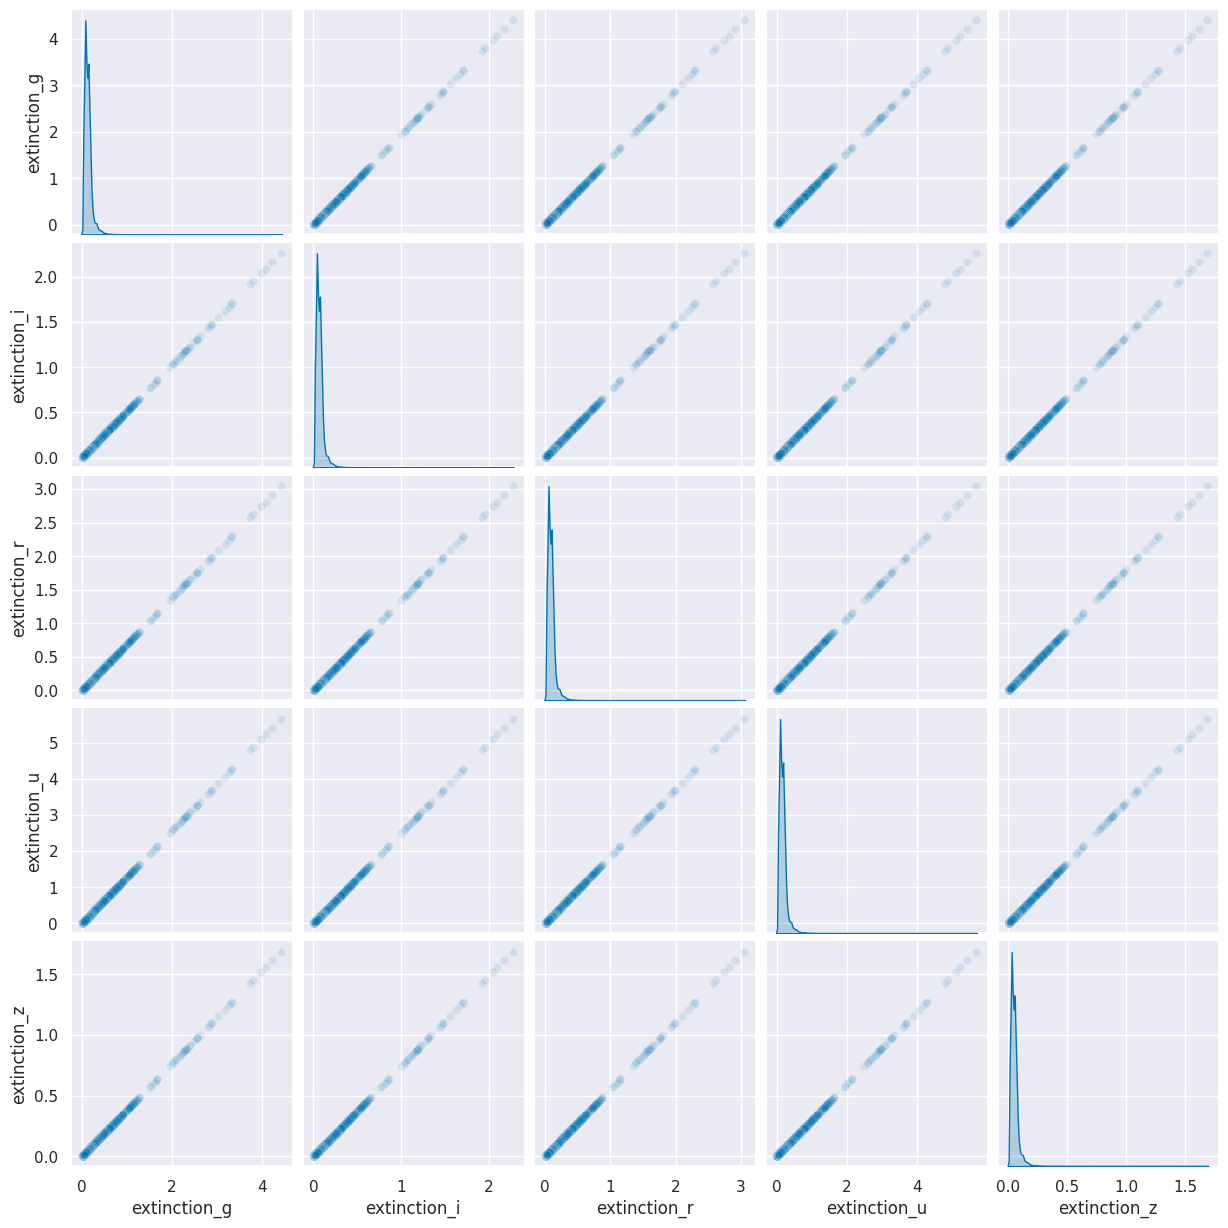

In [116]:
## further analyze extinction

df_ext = df_clean[vars]

sns.pairplot(df_ext, diag_kind='kde', kind="scatter", plot_kws={'alpha': 0.1})

plt.savefig('../IMG/extinction_pairplot.png', dpi=400)

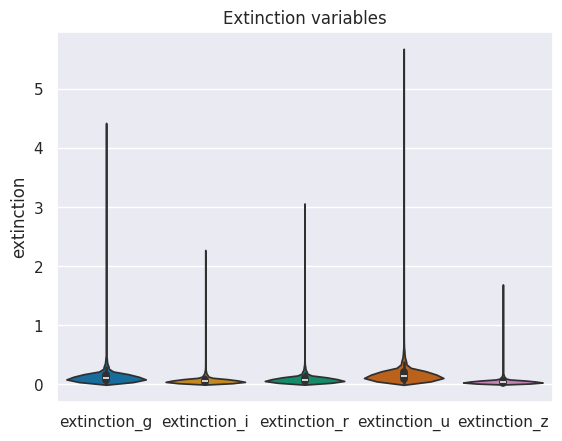

In [130]:
### Identify outliers

plt.title('Extinction variables');
plt.ylabel('extinction')
sns.violinplot(data=df_ext)

plt.savefig('../IMG/extinction_violin.png', dpi=350)

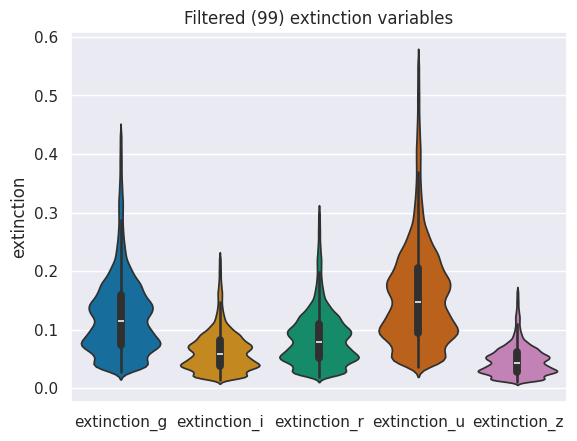

In [ ]:
### Filter outliers

th = 0.99
df_ext_filtered = df_ext[(df_ext < df_ext.quantile(th)).all(axis=1) & (df_ext > df_ext.quantile(1-th)).all(axis=1)]
plt.title('Filtered (99) extinction variables');
plt.ylabel('extinction')
sns.violinplot(df_ext_filtered)

#plt.savefig('../IMG/filtered99_extinction_violin.png', dpi=300)

- Discutir si acaso debemos hacer un filtro de 95, 99 u otro valor
- Podemos justificar este filtro con el cambio en el skewness o calculando a cuántos sigmas de distancia hay entre estos valores y la media

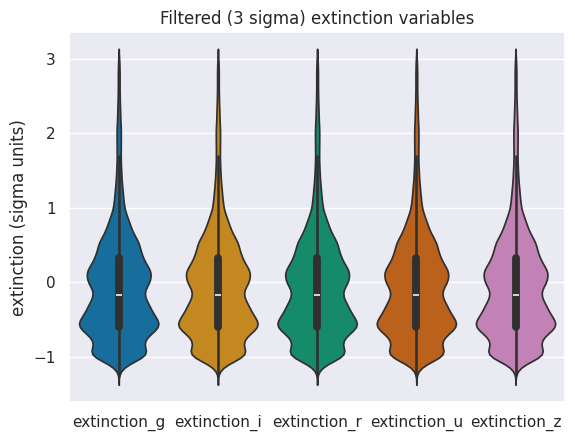

In [ ]:
## Calculate distance in sigma units for all extinction variables
mean_ext = df_ext.mean()
std_ext = df_ext.std()

df_ext_sigma = (df_ext - mean_ext)/std_ext

# Filter the outliers considering 3 sigma
th_sigma = 3
df_ext_sigma_filtered = df_ext_sigma[(df_ext_sigma < th_sigma).all(axis=1) & (df_ext_sigma > -th_sigma).all(axis=1)]
plt.title('Filtered (3 sigma) extinction variables');
plt.ylabel('extinction (sigma units)');
sns.violinplot(df_ext_sigma_filtered)

#plt.savefig('../IMG/extinction_filtered3sigma_violin.png', dpi=300)

In [136]:
## Calculate moments for raw, filter95, filter99 and 3sigma

df_ext_filtered_95 = df_ext[(df_ext < df_ext.quantile(.95)).all(axis=1) & (df_ext > df_ext.quantile(1-.95)).all(axis=1)]

moments_ext_raw = pd.DataFrame({'Mean': df_ext.mean(), 'Variance': df_ext.var(), 'Skewness': df_ext.skew(), 'Kurtosis': df_ext.kurtosis()})
moments_ext_95 = pd.DataFrame({'Mean': df_ext_filtered_95.mean(), 'Variance': df_ext_filtered_95.var(), 'Skewness': df_ext_filtered_95.skew(), 'Kurtosis': df_ext_filtered_95.kurtosis()})
moments_ext_99 = pd.DataFrame({'Mean': df_ext_filtered.mean(), 'Variance': df_ext_filtered.var(), 'Skewness': df_ext_filtered.skew(), 'Kurtosis': df_ext_filtered.kurtosis()})
moments_ext_3sigma = pd.DataFrame({'Mean': df_ext_sigma_filtered.mean(), 'Variance': df_ext_sigma_filtered.var(), 'Skewness': df_ext_sigma_filtered.skew(), 'Kurtosis': df_ext_sigma_filtered.kurtosis()})  

moments_ext_raw,moments_ext_95, moments_ext_99,moments_ext_3sigma

(                  Mean  Variance  Skewness    Kurtosis
 extinction_g  0.128675  0.008690  8.653870  239.272265
 extinction_i  0.066149  0.002297  8.653869  239.272245
 extinction_r  0.089017  0.004159  8.653870  239.272251
 extinction_u  0.165139  0.014314  8.653870  239.272263
 extinction_z  0.049203  0.001271  8.653871  239.272319,
                   Mean  Variance  Skewness  Kurtosis
 extinction_g  0.119430  0.002701  0.499746 -0.418565
 extinction_i  0.061396  0.000714  0.499746 -0.418565
 extinction_r  0.082621  0.001293  0.499746 -0.418565
 extinction_u  0.153273  0.004449  0.499746 -0.418565
 extinction_z  0.045667  0.000395  0.499746 -0.418565,
                   Mean  Variance  Skewness  Kurtosis
 extinction_g  0.124716  0.004734  1.310636  2.483549
 extinction_i  0.064114  0.001251  1.310636  2.483549
 extinction_r  0.086278  0.002266  1.310636  2.483549
 extinction_u  0.160057  0.007797  1.310636  2.483549
 extinction_z  0.047689  0.000692  1.310636  2.483549,
             

In [ ]:
# Add a new column with the filter type and export all these dataframes to single a csv file

moments_ext_raw['Filter'] = 'Raw'
moments_ext_95['Filter'] = 'P95'
moments_ext_99['Filter'] = 'P99'
moments_ext_3sigma['Filter'] = 'ThreeSigma'

all_moments = [moments_ext_raw,moments_ext_95, moments_ext_99,moments_ext_3sigma]
final_results_df = pd.concat(all_moments)

#final_results_df.to_csv('extinction_moments_filters.csv', index=True)

We leave the plots for a sec and go back to NaN search

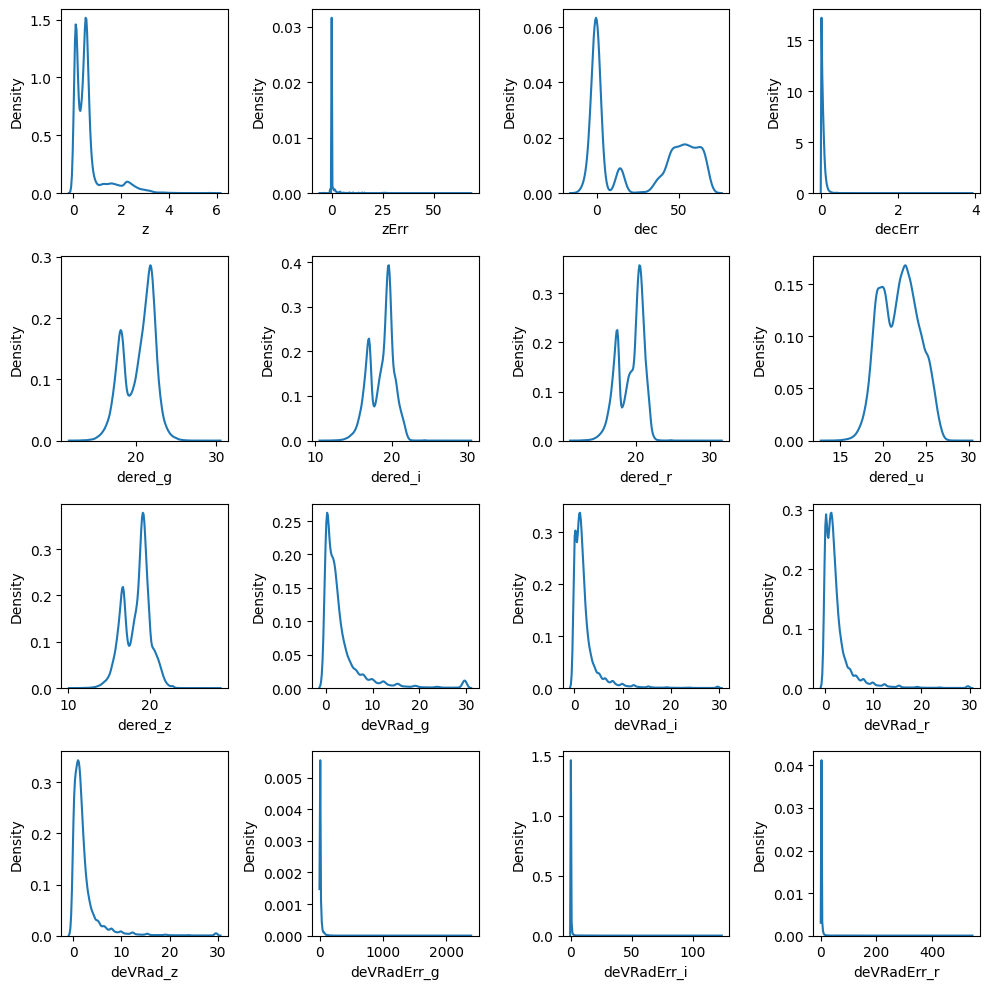

In [12]:
# Search for other NaN values

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    sns.kdeplot(data=df_clean, x=df_clean.columns[i])
    plt.xlabel(df_clean.columns[i])

plt.tight_layout()  

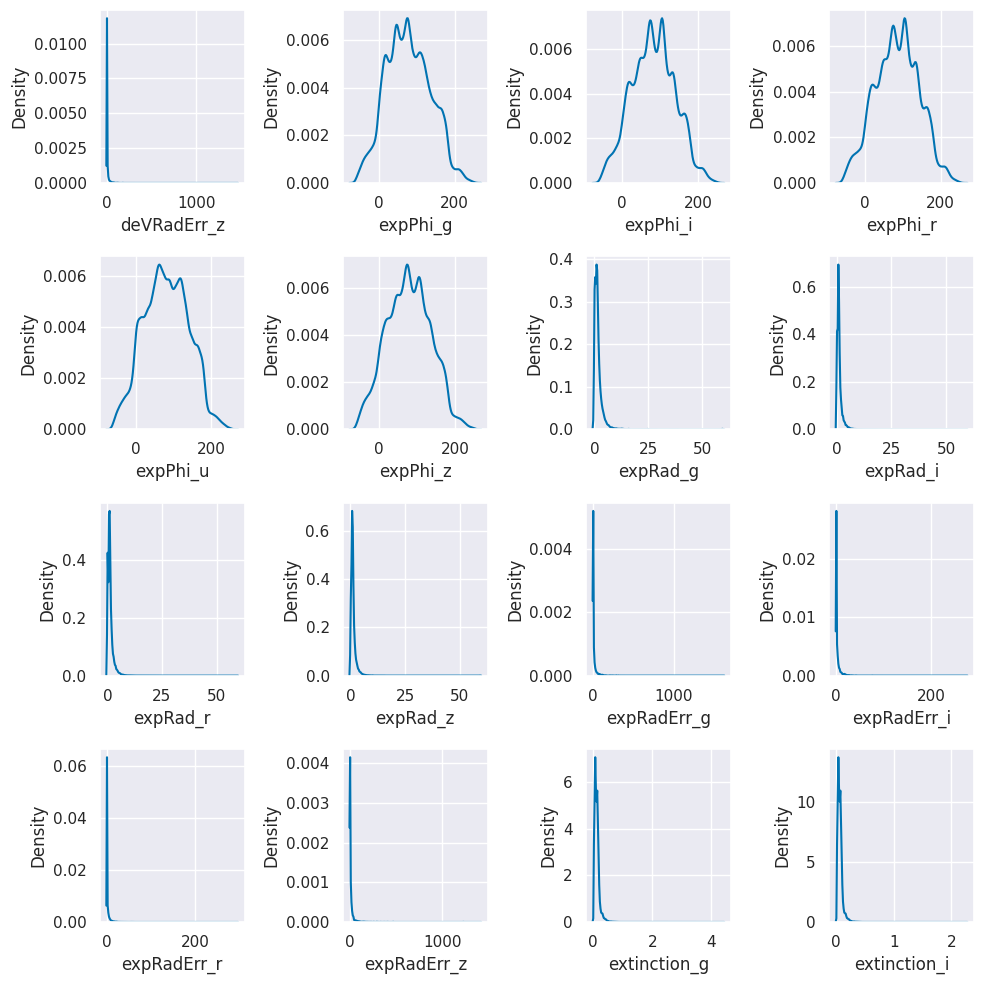

In [34]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    sns.kdeplot(data=df_clean, x=df_clean.columns[16+i])
    plt.xlabel(df_clean.columns[16+i])

plt.tight_layout()  

In [43]:
# Identify variables with several repeated values

len(df_clean)-df_clean.nunique()

z               1231
zErr            1501
dec                1
decErr             1
dered_g        17103
               ...  
psfMagErr_i     1976
psfMagErr_r     1701
psfMagErr_u      878
psfMagErr_z     1744
ra                 1
Length: 68, dtype: int64

In [45]:
len(df_clean)-df_clean.nunique()[len(df_clean)-df_clean.nunique()>800]


z               1231
zErr            1501
dered_g        17103
dered_i        20875
dered_r        20384
               ...  
psfMagErr_g     1684
psfMagErr_i     1976
psfMagErr_r     1701
psfMagErr_u      878
psfMagErr_z     1744
Length: 65, dtype: int64

In [ ]:
# Most repeated value

df_clean['dered_i'].value_counts().index[0]         

np.float64(19.55709)

In [ ]:
# Also check for multiple modes

df_clean.mode()

,z,zErr,dec,decErr,dered_g,dered_i,dered_r,dered_u,dered_z,deVRad_g,...,psfMag_i,psfMag_r,psfMag_u,psfMag_z,psfMagErr_g,psfMagErr_i,psfMagErr_r,psfMagErr_u,psfMagErr_z,ra
0,0.1097,-1.0,13.56414,0.009301,21.27772,19.55709,19.91984,18.89037,16.51312,0.0,...,20.08879,21.46262,24.63461,19.93748,0.017115,0.015189,0.013863,0.105483,0.021715,31.891871
1,NaN,NaN,NaN,NaN,21.62121,NaN,20.31316,18.93931,18.80466,NaN,...,20.36967,21.62749,NaN,22.82690,0.017365,0.015655,0.015521,0.108688,0.027406,NaN
2,NaN,NaN,NaN,NaN,21.71155,NaN,20.49151,19.26314,18.85724,NaN,...,20.46526,NaN,NaN,NaN,0.019010,0.015713,0.016911,0.109734,0.029456,NaN
3,NaN,NaN,NaN,NaN,22.06268,NaN,NaN,19.32053,19.00694,NaN,...,20.70290,NaN,NaN,NaN,0.019027,0.016530,0.017058,0.141310,0.100910,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.63030,19.02397,NaN,...,21.00064,NaN,NaN,NaN,0.019243,0.016921,0.017589,0.607201,0.101530,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.77131,19.03318,NaN,...,NaN,NaN,NaN,NaN,0.020058,0.017029,0.017867,0.686544,0.102853,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.85742,19.08713,NaN,...,NaN,NaN,NaN,NaN,0.020579,0.017531,0.018368,0.757187,0.103279,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.19481,19.09768,NaN,...,NaN,NaN,NaN,NaN,0.021845,0.017547,0.018538,NaN,0.103658,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.31738,19.09850,NaN,...,NaN,NaN,NaN,NaN,0.022652,0.017738,0.018736,NaN,0.103692,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.33643,19.09852,NaN,...,NaN,NaN,NaN,NaN,0.023054,0.018147,0.018765,NaN,0.103716,NaN


Text(0, 0.5, 'dered_r')

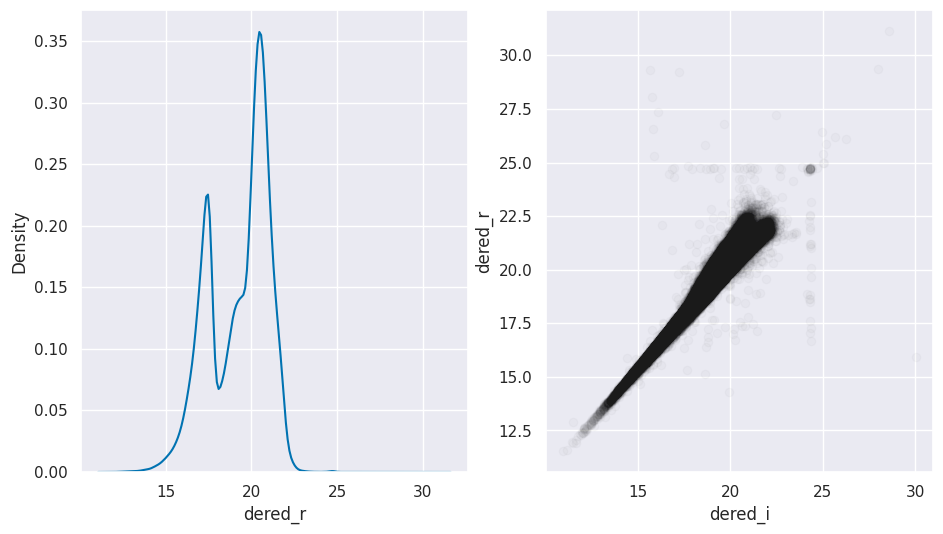

In [57]:
# Nuts

fig, ax = plt.subplots(1,2, figsize=(11,6))
sns.kdeplot(data=df_clean, x='dered_r',ax=ax[0])
ax[1].plot(df_clean['dered_i'], df_clean['dered_r'], 'ko', alpha=.02)
ax[1].set_xlabel('dered_i')
ax[1].set_ylabel('dered_r')

# Generate splits

1. Random Train-Val-Test split: 70-15-15 (seed 42)
2. Using a region of the sky for test and randomly split the remainings between train and val (seed 42)
    - Samples close to `dec=2.5` and `ra=80`
3. Using the same test region from (2) and a 2nd and 3rd region train and val sets
    - Val set: close to `dec=15` (approximately even distributed z)
    - Train set: the remaining samples    

    